### Linear Regression and Boston Data Set

- Load Boston Data Set from `sklearn.datasets`, use 

```
from sklearn.datasets import load_boston
boston = load_boston()
```
- Assign `data` to `X` and `target` to `y`


In [78]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target
df = pd.concat([X, pd.DataFrame({'MEDV': y})], axis=1)

c:\Coding\conda\envs\datsci\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

- Check the shape of the dataset

In [79]:
X.shape, y.shape

((506, 13), (506,))

- Plot the scatter plot of each attribute versus `MEDV`
- You can use the starter code below

```
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
  ```

In [80]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

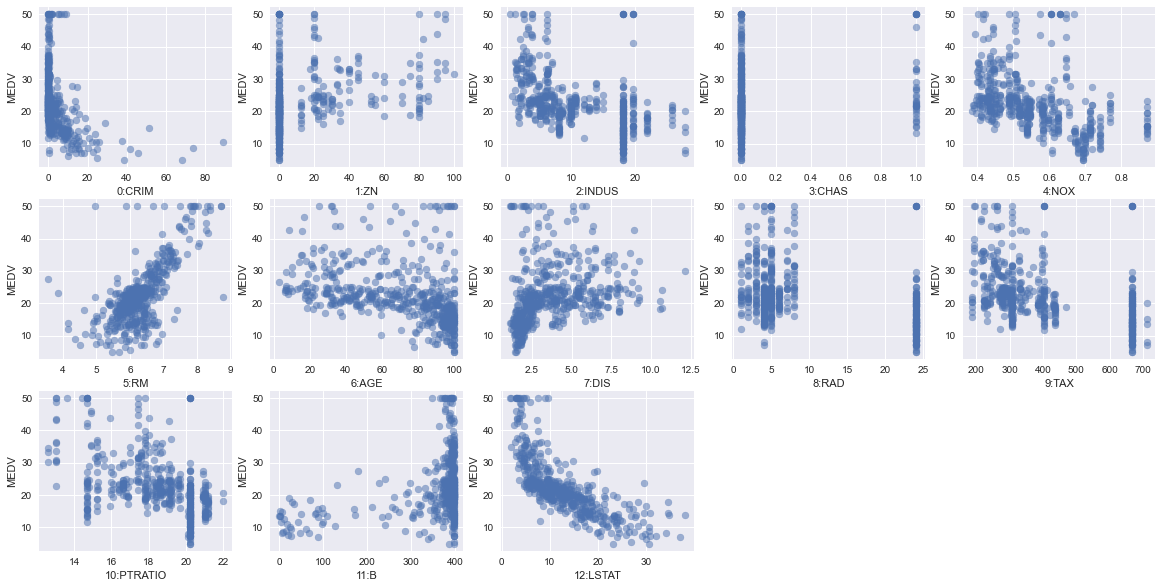

In [81]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    x = X.loc[:,X.columns[i]]
    ax.scatter(x, y, marker='o', alpha=.5)
    ax.set_xlabel(f'{i}:'+X.columns[i])
    ax.set_ylabel('MEDV')


- Split the dataset into test and train datasets, you can set the random seed to 42 by `random_state=42`

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that you can import
```
from sklearn.ensemble import RandomForestRegressor
```

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [85]:
lrscores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)

np.mean(lrscores)

0.7160133196648374

In [86]:
rfrscores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10)

np.mean(rfrscores)

0.8462716847195386

## Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [87]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [88]:
tf = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures(include_bias=False))
])
X_tf = tf.fit_transform(X)
Xtf_train, Xtf_test, y_train, y_test = train_test_split(X_tf, y, random_state = 42)

In [89]:
lr2scores = cross_val_score(LinearRegression(), Xtf_train, y_train, cv=10)

np.mean(lr2scores)

0.8062549056216686

In [90]:
rfr2scores = cross_val_score(RandomForestRegressor(), Xtf_train, y_train, cv=10)

np.mean(rfr2scores)

0.8208602289665752

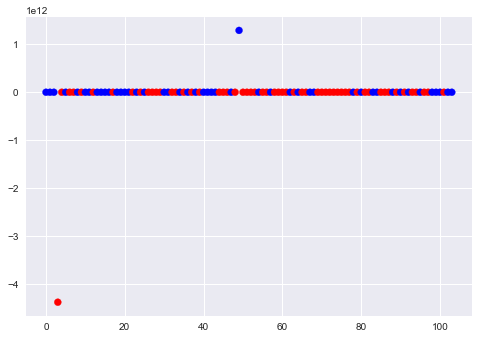

In [91]:
lr = LinearRegression()
model = lr.fit(Xtf_train, y_train)
plt.scatter(range(X_tf.shape[1]), model.coef_, c=np.sign(model.coef_), cmap="bwr_r")

trying with scaler before polynomial transformation:

In [92]:
tf = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer()),
])
X_tf = tf.fit_transform(X)
Xtf_train, Xtf_test, y_train, y_test = train_test_split(X_tf, y, random_state = 42)

In [93]:
lr2scores = cross_val_score(LinearRegression(), Xtf_train, y_train, cv=10)

np.mean(lr2scores)

0.8065194743874047

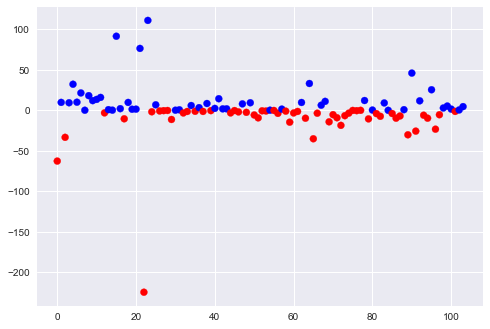

In [95]:
lr = LinearRegression()
model = lr.fit(Xtf_train, y_train)
plt.scatter(range(X_tf.shape[1]), model.coef_, c=np.sign(model.coef_), cmap="bwr_r")